In [1]:
!pip3 install -U ucimlrepo 

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.6 MB 11.2 MB/s eta 0:00:01
   ----------------- ---------------------- 5.0/11.6 MB 11.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.3/11.6 MB 11.6 MB/s eta 0:00:01
   --------------------------------- ------ 9.7/11.6 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 11.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.9 MB 11.2 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 11.0 MB/s eta 0:00:01
   ---------------------- ----------------- 7.1/12.9 MB 11.2 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.9 MB 11.4 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.9 MB 11.4 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 10.5 MB/s eta 0:00:00

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
df = fetch_ucirepo(id=544) 
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets

In [3]:
X

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [4]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


<Axes: xlabel='Weight', ylabel='Height'>

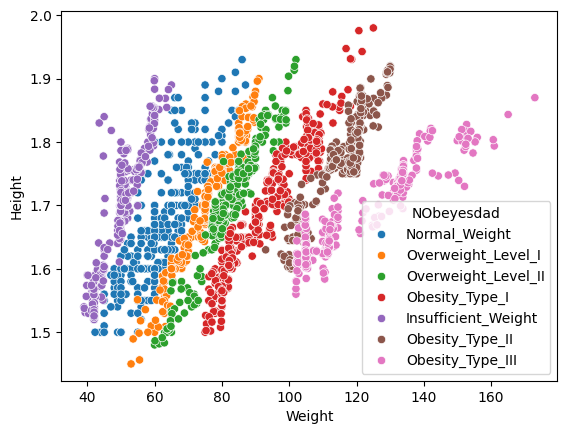

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(x=X['Weight'], y=X['Height'],hue=y['NObeyesdad'])

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd


# Columnas numéricas y categóricas
col_numericas = ['Age', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

col_categoricas = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

### Establecer un mínimo y máximo entre 0 y 1 
# Preprocesador para estandarizar y codificar las variables/columnas
preprocesador = ColumnTransformer(
    transformers =[
        ('num', StandardScaler(), col_numericas),
        ('cat', OneHotEncoder(), col_categoricas),
    ])

# Pipeline para preprocesador y PCA

pca = PCA(n_components=16)
pipeline = Pipeline(steps=[('preprocesador', preprocesador), ('pca', pca)])

comp_principales = pipeline.fit_transform(X)

### Agregar IMC al dataframe de componentes 

df_comp = pd.DataFrame(comp_principales,  columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'])

df_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.355631,-1.079765,-0.011067,0.405928,-0.854014,-0.331947,1.306100,-0.724004,-0.264183,0.239143,-1.106451,0.267291,-0.198452,-0.023611,-0.007220,0.027927
1,-1.123807,2.674789,0.843292,-0.829431,1.142456,-0.529977,0.570072,0.719452,-0.271573,0.367978,-1.256962,0.000635,1.194887,0.310344,-0.070694,-1.193337
2,-1.162171,0.230354,-1.150579,0.136239,0.546220,0.203282,0.029726,-0.202331,0.072412,0.684075,-1.103427,0.210938,-0.061646,0.993635,-0.366284,0.482507
3,0.296599,1.569763,0.169060,0.157134,1.490953,0.004730,0.045419,-0.352826,1.342336,-0.084695,-0.827024,0.746516,-0.229798,1.045619,0.100927,0.240768
4,1.009400,-1.494468,-0.044984,-1.777309,0.331445,-1.446279,-0.391885,0.004868,1.214194,0.119427,-0.954384,0.692496,-0.278205,-0.033576,-0.171774,0.010395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,-0.745293,0.344832,1.153428,0.589286,0.486924,0.489455,-0.253330,0.560270,-0.604426,-0.013052,-0.013133,-0.023264,-0.054968,0.009749,0.033197,0.035495
2107,-0.327546,0.615854,1.209507,0.347274,0.146128,0.068676,-0.139556,0.426978,-0.556111,-0.010552,0.015267,0.006140,-0.051700,0.013542,0.021544,0.022175
2108,-0.365227,0.692824,1.156696,0.302177,0.124488,0.167947,-0.114114,0.470962,-0.547719,0.026024,0.028092,0.022811,-0.050648,0.006325,0.022578,0.023452
2109,-0.293644,1.350716,1.100578,-0.384393,-0.774295,-0.019523,0.190049,0.417882,-0.378941,0.079495,0.095123,0.089702,-0.055586,-0.018664,-0.002216,-0.000757


In [19]:
pca.explained_variance_ratio_.cumsum()

array([0.18040525, 0.32910235, 0.46138746, 0.57665464, 0.68041951,
       0.77112738, 0.82169004, 0.86748625, 0.90539244, 0.92738836,
       0.94827392, 0.96689691, 0.97638211, 0.98212312, 0.98705042,
       0.99162501])

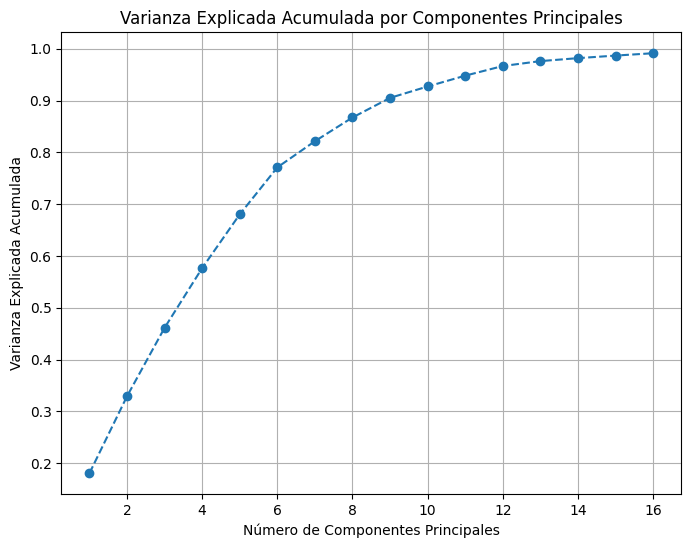

In [20]:
import numpy as np

# Graficar la varianza explicada acumulada por las componentes principales
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

In [26]:
pipeline["preprocesador"].get_feature_names_out()

array(['num__Age', 'num__FCVC', 'num__NCP', 'num__CH2O', 'num__FAF',
       'num__TUE', 'cat__Gender_Female', 'cat__Gender_Male',
       'cat__family_history_with_overweight_no',
       'cat__family_history_with_overweight_yes', 'cat__FAVC_no',
       'cat__FAVC_yes', 'cat__CAEC_Always', 'cat__CAEC_Frequently',
       'cat__CAEC_Sometimes', 'cat__CAEC_no', 'cat__SMOKE_no',
       'cat__SMOKE_yes', 'cat__SCC_no', 'cat__SCC_yes',
       'cat__CALC_Always', 'cat__CALC_Frequently', 'cat__CALC_Sometimes',
       'cat__CALC_no', 'cat__MTRANS_Automobile', 'cat__MTRANS_Bike',
       'cat__MTRANS_Motorbike', 'cat__MTRANS_Public_Transportation',
       'cat__MTRANS_Walking'], dtype=object)

In [27]:
pd.DataFrame(pca.components_, columns=pipeline["preprocesador"].get_feature_names_out())

,num__Age,num__FCVC,num__NCP,num__CH2O,num__FAF,num__TUE,cat__Gender_Female,cat__Gender_Male,cat__family_history_with_overweight_no,cat__family_history_with_overweight_yes,...,cat__SCC_yes,cat__CALC_Always,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.642651,0.075118,-0.203264,-0.227193,-0.402806,-0.515431,0.044470,-0.044470,-0.036351,0.036351,...,-0.015083,-0.000348,-0.000477,0.028461,-0.027636,0.163529,-0.001004,0.002564,-0.152004,-0.013086
1,0.247745,0.359279,0.418831,0.536044,0.446656,-0.327880,-0.065389,0.065389,-0.064909,0.064909,...,0.002091,-0.000758,0.006234,0.039059,-0.044535,0.090044,0.002689,0.001216,-0.097669,0.003720
2,-0.291868,0.799172,-0.095171,-0.041530,-0.238603,-0.053891,0.267921,-0.267921,0.037854,-0.037854,...,0.023594,-0.000315,-0.013230,0.076271,-0.062726,-0.146073,-0.003308,-0.001334,0.154214,-0.003499
3,0.026771,0.036092,0.815483,-0.552810,-0.101411,0.072030,0.032681,-0.032681,0.007855,-0.007855,...,-0.005361,-0.000810,-0.008326,0.043198,-0.034063,0.040967,-0.000375,0.000120,-0.039862,-0.000851
4,-0.104539,0.083267,-0.241436,-0.529532,0.658626,-0.346049,-0.003940,0.003940,0.126990,-0.126990,...,0.029404,-0.000058,0.000603,-0.124836,0.124291,-0.001345,0.002502,0.002061,-0.017730,0.014513
5,0.457063,0.341297,-0.160332,-0.139354,0.219006,0.682261,0.014927,-0.014927,-0.092802,0.092802,...,-0.012090,0.000915,0.024467,-0.143922,0.118539,0.159981,-0.000965,-0.004055,-0.167586,0.012625
6,0.113896,-0.215358,0.123942,0.205548,-0.011796,0.003650,0.482059,-0.482059,0.143673,-0.143673,...,0.054293,-0.000289,0.024649,-0.369426,0.345066,0.041146,0.000385,0.001874,-0.054692,0.011287
7,0.168810,-0.189010,-0.061496,-0.007972,0.247311,0.117142,0.326259,-0.326259,0.148766,-0.148766,...,0.012803,-0.000193,-0.004229,0.547988,-0.543566,0.009004,-0.001065,-0.005482,0.002748,-0.005205
8,0.062959,0.134178,-0.000550,0.086099,-0.156437,0.123333,-0.270688,0.270688,0.478492,-0.478492,...,0.073759,0.001203,0.038036,0.066015,-0.105254,0.120555,0.003877,0.012291,-0.180598,0.043875
9,0.358508,-0.022056,0.020212,-0.023380,0.046055,0.050864,-0.080529,0.080529,-0.133126,0.133126,...,-0.016330,0.000248,0.020117,0.022062,-0.042427,-0.524291,-0.001305,-0.001150,0.565211,-0.038466


In [10]:
pc = pca.fit_transform(x)
pdf = pd.DataFrame(data = pca
             , columns = ['Componente 1', 'Componente 2', 'Componente 3', 'Componente'])

NameError: name 'x' is not defined